# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [2]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [3]:
base

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,56,1,166,65,1,1,0,0,0,0
9996,50,1,160,93,2,1,0,0,1,1
9997,40,1,158,66,2,2,0,0,1,0
9998,50,1,168,70,3,1,0,0,1,1


In [4]:
# Printa informações sobre a base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


#### Vemos que a coluna weight está como tipo object, ou seja, tem alguma coisa errada ai. Vamos investigar!

In [5]:
# Printa os valore unicos da coluna weight
base['weight'].unique()

array(['62', '85', '64', '82', '56', '67', '93', '95', '71', '68', '80',
       '60', '78', '112', '75', '52', '83', '69', '90', '45', '65', '59',
       '66', '74', '105', '73', '55', '70', '72', '63', '50', '107', '84',
       '77', '79', '76', '58', '115', '97', '53', '57', '49', '110', '94',
       '92', '87', '103', '88', '99', '100', '61', '48', '54', '51', '47',
       '91', '104', '81', '98', '108', '89', '101', '86', '65,5', '142',
       '96', '44', '41', '169', '116', '200', '64,8', '120', '117', '125',
       '106', '114', '113', '129', '124', '42', '123', '111', '102',
       '109', '46', '139', '150', '138', '131', '43', '83,6', '134',
       '106,5', '121', '40', '141', '119', '126', '177', '165', '122',
       '62,3', '118', '89,5', '132', '155', '130', '159', '84,6', '140',
       '82,3', '30', '67,9', '127', '67,5', '74,3', '149', '180', '128',
       '60,2', '64,5', '58,7', '90,5', '37', '80,8', '166', '161', '92,2',
       '75,6', '136', '82,9', '154', '68,9', '170'

#### Vemos que alguns números estão usando a vírgula como separador decimal. O correto seria usar o ponto. Vamos corrigir isso.

In [6]:
# Muda o caracter virgula pelo ponto e aproveita e transforma a coluna para float
base['weight'] = base['weight'].str.replace(',','.').astype(float)

In [7]:
# Verifica as mudanças
base['weight'].unique()

array([ 62. ,  85. ,  64. ,  82. ,  56. ,  67. ,  93. ,  95. ,  71. ,
        68. ,  80. ,  60. ,  78. , 112. ,  75. ,  52. ,  83. ,  69. ,
        90. ,  45. ,  65. ,  59. ,  66. ,  74. , 105. ,  73. ,  55. ,
        70. ,  72. ,  63. ,  50. , 107. ,  84. ,  77. ,  79. ,  76. ,
        58. , 115. ,  97. ,  53. ,  57. ,  49. , 110. ,  94. ,  92. ,
        87. , 103. ,  88. ,  99. , 100. ,  61. ,  48. ,  54. ,  51. ,
        47. ,  91. , 104. ,  81. ,  98. , 108. ,  89. , 101. ,  86. ,
        65.5, 142. ,  96. ,  44. ,  41. , 169. , 116. , 200. ,  64.8,
       120. , 117. , 125. , 106. , 114. , 113. , 129. , 124. ,  42. ,
       123. , 111. , 102. , 109. ,  46. , 139. , 150. , 138. , 131. ,
        43. ,  83.6, 134. , 106.5, 121. ,  40. , 141. , 119. , 126. ,
       177. , 165. , 122. ,  62.3, 118. ,  89.5, 132. , 155. , 130. ,
       159. ,  84.6, 140. ,  82.3,  30. ,  67.9, 127. ,  67.5,  74.3,
       149. , 180. , 128. ,  60.2,  64.5,  58.7,  90.5,  37. ,  80.8,
       166. , 161. ,

#### Agora vamos investigar a presença de outliers

In [8]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### A coluna height possui outliers (2,5m de altura é até possível mas vou consigerar outlier)

Vamos identificar quantos outlier temos

In [9]:
# Mostra os 2 maiores valores da coluna
base["height"].nlargest(2)

6486    250
1117    198
Name: height, dtype: int64

#### Como apenas uma linha possui o outlier, eu simplesmente vou descartá-la

In [10]:
# Descarta a linha 6486 que é a linha com a altura de 2,5m
base = base.drop([6486])

In [11]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000
mean,53.287829,1.345435,164.299630,74.302540,1.364836,1.222222,0.089009,0.053705,0.79718,0.503050
std,6.796411,0.475534,8.134179,14.566611,0.677495,0.565585,0.284771,0.225447,0.40212,0.500016
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000
max,65.000000,2.000000,198.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000


# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


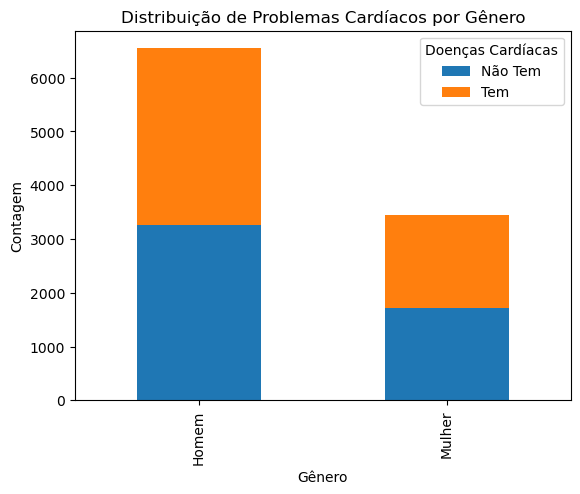

In [12]:
# Gráfico entre Genero e Doença Cardiaca
Genero = base['gender'].map({1: 'Homem', 2: 'Mulher'})
contagem = pd.crosstab(Genero, base['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de Problemas Cardíacos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Doenças Cardíacas', labels=['Não Tem', 'Tem'])
plt.show()

Vemos que as doenças cardíacas não parecem possuir correlação com a variável Genero. Mais ou menos metade dos homens e metade das mulheres possuem doença cardíaca

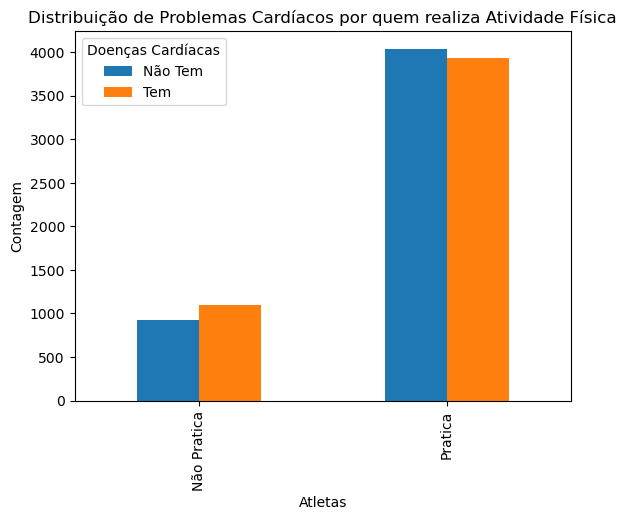

In [13]:
# Gráfico entre Atividade física e Doença Cardiaca
Atividade = base['active'].map({1: 'Pratica', 0: 'Não Pratica'})
contagem = pd.crosstab(Atividade, base['cardio_disease'])
contagem.plot(kind='bar', stacked=False)
plt.title('Distribuição de Problemas Cardíacos por quem realiza Atividade Física')
plt.xlabel('Atletas')
plt.ylabel('Contagem')
plt.legend(title='Doenças Cardíacas', labels=['Não Tem', 'Tem'])
plt.show()

No gráfico acima vemos que dos não praticantes de atividades, mais da metade possui doença cardíaca. E dos praticante de atividades é o contrário, mais da metade não possui. 

Apesar disso, os valores ainda são bem proximos, indicando que não há uma correlação muito forte entre as duas variáveis

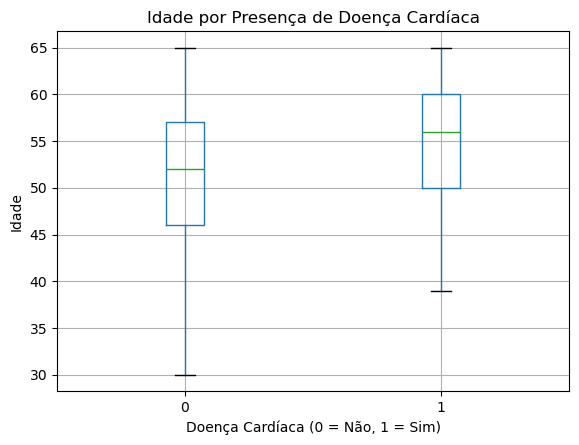

In [14]:
# Gráfico entre Idade e Doença Cardiaca
base.boxplot(column='age', by='cardio_disease')

plt.title('Idade por Presença de Doença Cardíaca')
plt.suptitle('')
plt.xlabel('Doença Cardíaca (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

A partir do boxplot acima vemos que pessoas com Doenças Cardíacas possuem uma média de idade maior do que as pessoas sem doenças cardíacas

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



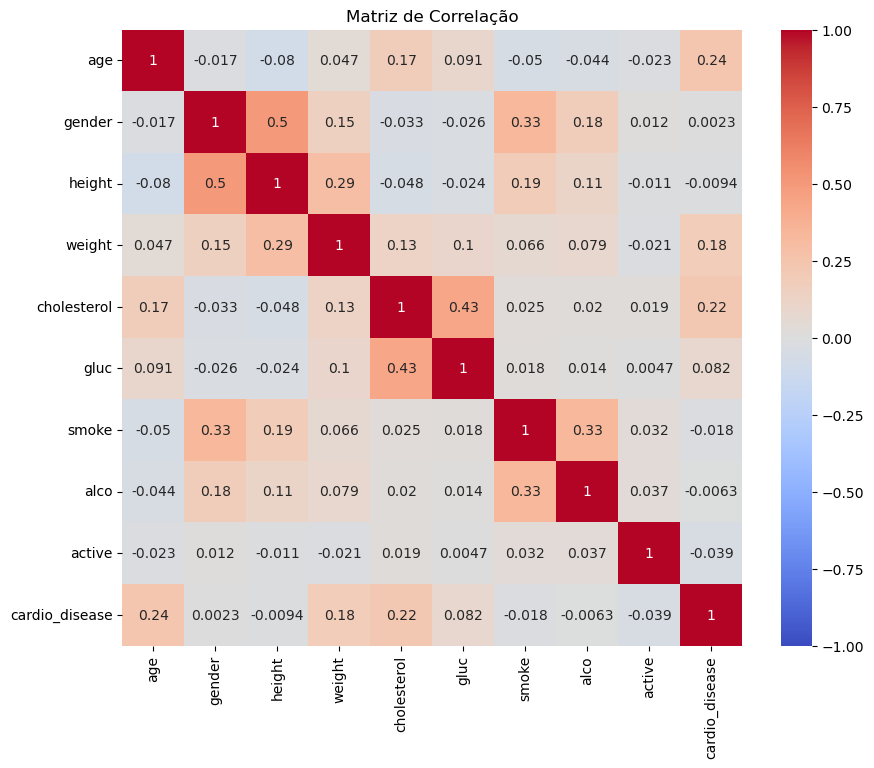

In [15]:
correlation_matrix = base.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

### As variáveis com maior correlação com Doenças Cardias são:
- Idade: Quanto mais velho maior a chance de ter doença
- Peso: Quanto mais gordo maior a chande de ter doença
- Colesterol: Quanto maior os níveis de colesterol maior a chance de ter doença

### Outras correlações notáveis são:
- Entre genero e altura: o gráfico diz que as mulheres (nesta base de dados) são mais altas que os homens pois há uma correlação positiva entre as duas variáveis e os homens são representados como 1 e as mulheres como 2. Normalmente é o contrário, os homens tendem a ter uma estatura maior.
- Entre genero e peso: o gráfico diz que as mulheres (nesta base de dados) são mais gordas que os homens pois há uma correlação positiva entre as duas variáveis e os homens são representados como 1 e as mulheres como 2. Normalmente é o contrário, os homens tendem a pesar mais na média devido a sua estatura maior.
- Entre genero e fumantes: o gráfico diz que as mulheres (nesta base de dados) são mais fumantes que os homens pois há uma correlação positiva entre as duas variáveis e os homens são representados como 1 e as mulheres como 2. Normalmente é o contrário, segundo a OMS os homens fumam mais que as mulheres.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [16]:
# Separando em X (variáveis de entrada) e Y (variável de saída)
X = base.drop('cardio_disease', axis=1)  # X contém todas as colunas exceto 'cardio_disease'
Y = base['cardio_disease']  # Y contém apenas a coluna 'cardio_disease'

# Separar em base de treino e teste (usando 75% para treino e 25% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=11)

#### A base certamente deve ser padronizado, há variaveis como altura que vão até quase 200 e outras que são binárias (0 ou 1; 1 ou 2)

In [17]:
# Inicializar StandardScaler
sc = StandardScaler()

# Ajustando e transformando os dados de treino
X_train = sc.fit_transform(X_train)

# Transformando os dados de teste usando os parâmetros aprendidos dos dados de treino
X_test = sc.transform(X_test)

In [18]:
# Verifica balanceamento
base['cardio_disease'].value_counts()

cardio_disease
1    5030
0    4969
Name: count, dtype: int64

#### A base já está balanceada, a diferença entre pessoas com doenças cardíacas e sem doenças é mínima

In [19]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-1.65721153 -0.72571991 -1.50897118 ... -0.30754631 -0.24203868
   0.50503739]
 [-1.0711848  -0.72571991 -1.01740307 ...  3.25154284  4.13157107
   0.50503739]
 [ 1.56593547 -0.72571991  0.58019326 ... -0.30754631 -0.24203868
  -1.98005143]
 ...
 [-0.19214471 -0.72571991  0.45730124 ... -0.30754631 -0.24203868
   0.50503739]
 [ 0.68689538  1.37794209  1.31754542 ...  3.25154284 -0.24203868
   0.50503739]
 [-0.19214471 -0.72571991  0.58019326 ... -0.30754631 -0.24203868
  -1.98005143]]
[[-1.65721153  1.37794209  0.58019326 ... -0.30754631 -0.24203868
   0.50503739]
 [ 0.39388201 -0.72571991 -1.38607915 ... -0.30754631 -0.24203868
   0.50503739]
 [ 0.10086865 -0.72571991 -1.50897118 ... -0.30754631 -0.24203868
   0.50503739]
 ...
 [-0.77817144 -0.72571991 -1.01740307 ... -0.30754631 -0.24203868
  -1.98005143]
 [ 0.54038869 -0.72571991 -0.28005092 ... -0.30754631 -0.24203868
   0.50503739]
 [-1.21769149 -0.72571991  0.58019326 ... -0.30754631 -0.24203868
   0.50503739]]
2262    0
1454  

# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [20]:
# Etapa de treinamento
logistic_carro = LogisticRegression(random_state = 0)

logistic_carro.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Intercept e coeficientes

In [21]:
logistic_carro.intercept_

array([0.03186356])

In [22]:
logistic_carro.coef_

array([[ 0.45273627,  0.02126272, -0.08045639,  0.37087684,  0.4090942 ,
        -0.07375178, -0.03321483, -0.0309335 , -0.08019681]])

#### Avaliação do modelo treinado

In [23]:
previsoes = logistic_carro.predict(X_train)

relatorio = classification_report(y_train, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      3720
           1       0.65      0.62      0.63      3779

    accuracy                           0.64      7499
   macro avg       0.64      0.64      0.64      7499
weighted avg       0.64      0.64      0.64      7499



Não parece que o modelo está fazendo boas previsões. Tanto Acuracia, quanto Recall e o F1-score ficaram próximos de 0.65. Este não é um bom valor, para considerarmos uma boa previsão, estas métricas deveriam ficar acima de 0.80

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [24]:
Y_pred_test = logistic_carro.predict(X_test)

relatorio = classification_report(y_test, Y_pred_test)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1249
           1       0.65      0.63      0.64      1251

    accuracy                           0.64      2500
   macro avg       0.64      0.64      0.64      2500
weighted avg       0.64      0.64      0.64      2500



Novamente, valores muito parecidos com os valores do treino. Não é péssimo mas deixa muito a desejar.

AUC: 0.64


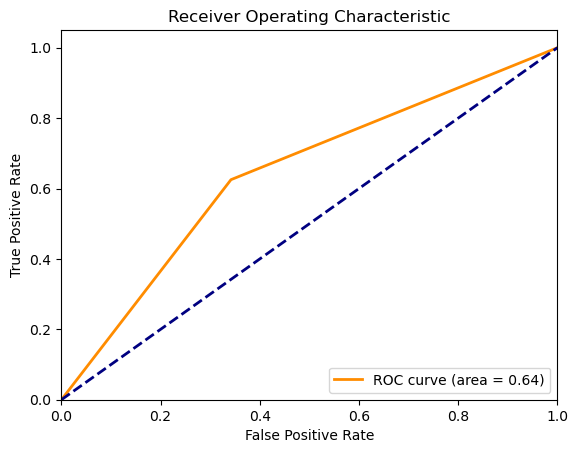

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_test)

# Calcular a AUC
roc_auc = roc_auc_score(y_test, Y_pred_test)
print("AUC: {:.2f}".format(roc_auc))


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Atravez do gráfico vemos que o modelo não é tão bom, ele tem 63% de chance de acertar se a pessoa possui doença cardíaca. (valor do recall)

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



#### Respostas

A) Regressão logistica é um modelo de machine learning que calcula a probabilidade de um evento binário acontecer

B) Regressão Logística é um modelo de classificação pois ele calcula a probabilidade de um evento binário acontecer. Ele não consegue estimar valores, só diz sim ou não.

C) Os pontos em comum são que ambos são modelos lineares e ambos calculam coeficiente para a maximizar a previsão.